In [1]:
if __name__=="__main__":
	import sys
	sys.path.append('/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/Scripts')
from src.SMT_Analysis_BP.databases.trajectory_analysis_script import *
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from src.SMT_Analysis_BP.helpers.MSD_Utils import *
from src.SMT_Analysis_BP.helpers.plotting_functions import *
from src.SMT_Analysis_BP.helpers.import_functions import *
from src.SMT_Analysis_BP.helpers.Analysis_functions import *
from src.SMT_Analysis_BP.helpers.diff_mw import *
from src.SMT_Analysis_BP.Random.scalebars import *
from src.SMT_Analysis_BP.helpers.MSD_Utils import MSD_Calculations
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')  
from src.SMT_Analysis_BP.Parameter_Store.global_params import *


/var/folders/_t/qlzp5l894v16vmr8m_81x5x80000gn/T/ipykernel_13683/2780011708.py:17: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


In [2]:
path = "/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/Fixed_100ms/20231015/ll_ez/Movies"

#find all files in subdirectories called "scale_space_plus_blob_scale.csv"
files_scale = glob.glob(path + '/**/scale_space_plus_blob_scale.csv', recursive=True)
files_dbscan = glob.glob(path + '/**/DBSCAN_clusters.csv', recursive=True)
#find the files called localizations.csv
files_loc = glob.glob(path + '/**/localizations.csv', recursive=True)
#find the files called molecule_loc.csv
files_mol = glob.glob(path + '/**/molecule_loc.csv', recursive=True)
print(files_scale)

['/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/Fixed_100ms/20231015/ll_ez/Movies/Movie_6/Cell_1/Analysis/scale_space_plus_blob_scale.csv', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/Fixed_100ms/20231015/ll_ez/Movies/Movie_6/Cell_5/Analysis/scale_space_plus_blob_scale.csv', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/Fixed_100ms/20231015/ll_ez/Movies/Movie_6/Cell_2/Analysis/scale_space_plus_blob_scale.csv', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/Fixed_100ms/20231015/ll_ez/Movies/Movie_6/Cell_3/Analysis/scale_space_plus_blob_scale.csv', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/Fixed_100ms/20231015/ll_ez/Movies/Movie_6/Cell_4/Analysis/scale_space_plus_blob_scale.csv', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/Fixed_100ms/20231015/ll_ez/Movies/Movie_10/Cell_1/Analysis/scale_space_plus_blob_scale.csv', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/Fixed

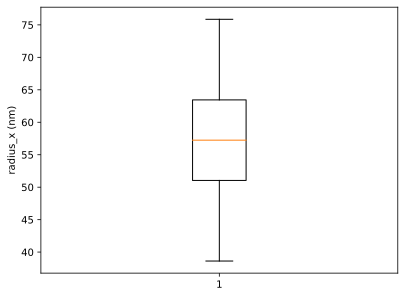

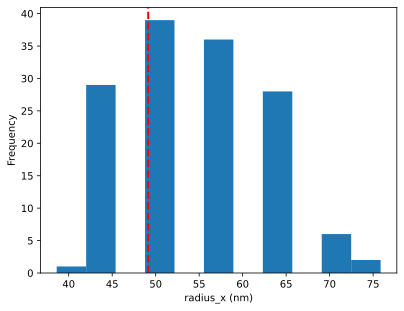

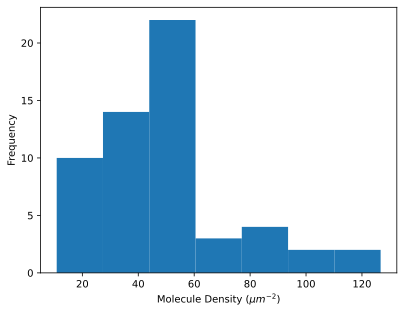

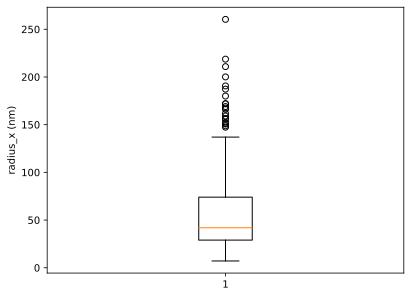

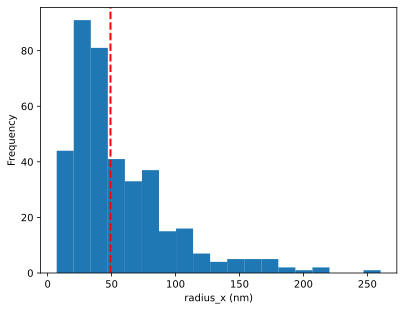

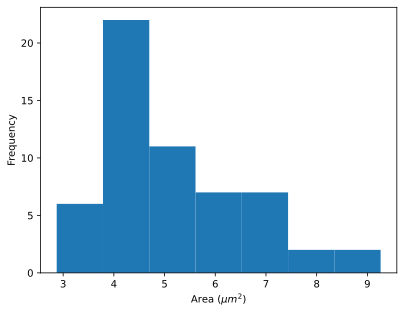

In [3]:
#read each file into a dataframe with 4 columns (x_pos, y_pos, radius_x, radius_y)
df = pd.concat([pd.read_csv(f, names=['x_pos', 'y_pos', 'radius_x', 'radius_y']) for f in files_scale], ignore_index=True)
#plot sizes of radius_x as boxplot but scale each value by 130
plt.boxplot(df['radius_x']*130)
plt.ylabel('radius_x (nm)')
plt.show()
#plot it as a histogram
plt.hist(df['radius_x']*130, bins=int(np.sqrt(len(df['radius_x']))))
#plot a verical line at 21*2.34
plt.axvline(x=21*2.34, color='r', linestyle='dashed', linewidth=2)
plt.xlabel('radius_x (nm)')
plt.ylabel('Frequency')
plt.show()

#for each file in localizations.csv, read it into a dataframe with the first line as the column names
df_loc_cell = [pd.read_csv(f, header=0) for f in files_mol]
#find the unique number of TRACK_IDs in each cell
cell_loc = []
cell_area = []
for i in range(len(df_loc_cell)):
    cell_loc.append(len(df_loc_cell[i]))
    cell_area.append(df_loc_cell[i]['area'].unique()[0])

for i in range(len(cell_area)):
    cell_loc[i] = cell_loc[i]/cell_area[i]

#plot the number of localizations in each cell
plt.hist(cell_loc, bins=int(np.sqrt(len(cell_loc))))
plt.xlabel('Molecule Density $(\mu m^{-2})$')
plt.ylabel('Frequency')
plt.show()

#plot the dbscan clusters for each cell
df_d = pd.concat([pd.read_csv(f, names=['x_pos', 'y_pos', 'radius_x']) for f in files_dbscan], ignore_index=True)
plt.boxplot(df_d['radius_x']*130)
plt.ylabel('radius_x (nm)')
plt.show()
#plot it as a histogram
plt.hist(df_d['radius_x']*130, bins=int(np.sqrt(len(df_d['radius_x']))))
#plot a verical line at 21*2.34
plt.axvline(x=21*2.34, color='r', linestyle='dashed', linewidth=2)
plt.xlabel('radius_x (nm)')
plt.ylabel('Frequency')
plt.show()

#plot the area of each cell
plt.hist(cell_area, bins=int(np.sqrt(len(cell_area))))
plt.xlabel('Area $(\mu m^{2})$')
plt.ylabel('Frequency')
plt.show()



LL clusters and LL hex treated clusters

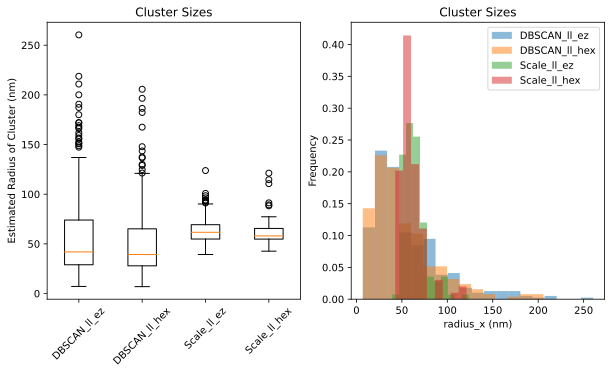

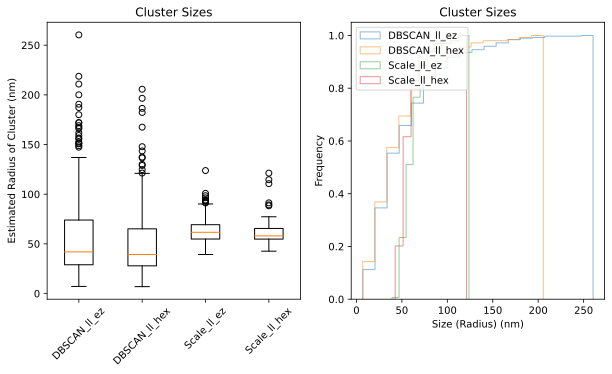

In [4]:
path_ll_ez = "/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/Fixed_100ms/20231015/ll_ez/Movies"
path_ll_hex = "/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/Fixed_100ms/20231017/ll_hex5_fixed/Movies"
files_loc_ll_ez = glob.glob(path_ll_ez + '/**/localizations.csv', recursive=True)
files_dbscan_ll_ez = glob.glob(path_ll_ez + '/**/DBSCAN_clusters.csv', recursive=True)
files_mol_ll_ez = glob.glob(path_ll_ez + '/**/molecule_loc.csv', recursive=True)
files_scale_ll_ez = glob.glob(path_ll_ez + '/**/scale_space_plus_blob_fitted.csv', recursive=True)

files_loc_ll_hex = glob.glob(path_ll_hex + '/**/localizations.csv', recursive=True)
files_dbscan_ll_hex = glob.glob(path_ll_hex + '/**/DBSCAN_clusters.csv', recursive=True)
files_mol_ll_hex = glob.glob(path_ll_hex + '/**/molecule_loc.csv', recursive=True)
files_scale_ll_hex = glob.glob(path_ll_hex + '/**/scale_space_plus_blob_fitted.csv', recursive=True)

#plot the cluster sizes for both as a boxplot for the DBSCAN and the scale space
df_d_ll_ez = pd.concat([pd.read_csv(f, names=['x_pos', 'y_pos', 'radius_x']) for f in files_dbscan_ll_ez], ignore_index=True)
df_d_ll_hex = pd.concat([pd.read_csv(f, names=['x_pos', 'y_pos', 'radius_x']) for f in files_dbscan_ll_hex], ignore_index=True)
df_ll_ez = pd.concat([pd.read_csv(f, names=['x_pos', 'y_pos', 'radius_x', 'radius_y']) for f in files_scale_ll_ez], ignore_index=True)
df_ll_hex = pd.concat([pd.read_csv(f, names=['x_pos', 'y_pos', 'radius_x', 'radius_y']) for f in files_scale_ll_hex], ignore_index=True)
fig = plt.figure(figsize=(10, 5))
gs = fig.add_gridspec(1, 2)
ax1 = fig.add_subplot(gs[0, 0])
#plot all them in one boxplot
ax1.boxplot([df_d_ll_ez['radius_x']*130, df_d_ll_hex['radius_x']*130, df_ll_ez['radius_x']*130, df_ll_hex['radius_x']*130])
ax1.set_xticklabels(['DBSCAN_ll_ez', 'DBSCAN_ll_hex', 'Scale_ll_ez', 'Scale_ll_hex'], rotation=45)
ax1.set_ylabel('Estimated Radius of Cluster (nm)')
ax1.set_title('Cluster Sizes')
ax2 = fig.add_subplot(gs[0, 1])
#plot all them in one histogram
ax2.hist(df_d_ll_ez['radius_x']*130, bins=int(np.sqrt(len(df_d_ll_ez['radius_x']))), alpha=0.5, label='DBSCAN_ll_ez',weights=np.ones(len(df_d_ll_ez['radius_x'])) / len(df_d_ll_ez['radius_x']))
ax2.hist(df_d_ll_hex['radius_x']*130, bins=int(np.sqrt(len(df_d_ll_hex['radius_x']))), alpha=0.5, label='DBSCAN_ll_hex',weights=np.ones(len(df_d_ll_hex['radius_x'])) / len(df_d_ll_hex['radius_x']))
ax2.hist(df_ll_ez['radius_x']*130, bins=int(np.sqrt(len(df_ll_ez['radius_x']))), alpha=0.5, label='Scale_ll_ez',weights=np.ones(len(df_ll_ez['radius_x'])) / len(df_ll_ez['radius_x']))
ax2.hist(df_ll_hex['radius_x']*130, bins=int(np.sqrt(len(df_ll_hex['radius_x']))), alpha=0.5, label='Scale_ll_hex',weights=np.ones(len(df_ll_hex['radius_x'])) / len(df_ll_hex['radius_x']))

ax2.legend(loc='upper right')
ax2.set_xlabel('radius_x (nm)')
ax2.set_ylabel('Frequency')
ax2.set_title('Cluster Sizes')
plt.show()


#make the cumulative distribution plot for the cluster sizes
fig = plt.figure(figsize=(10, 5))
gs = fig.add_gridspec(1, 2)
ax1 = fig.add_subplot(gs[0, 0])
#plot all them in one boxplot
ax1.boxplot([df_d_ll_ez['radius_x']*130, df_d_ll_hex['radius_x']*130, df_ll_ez['radius_x']*130, df_ll_hex['radius_x']*130])
ax1.set_xticklabels(['DBSCAN_ll_ez', 'DBSCAN_ll_hex', 'Scale_ll_ez', 'Scale_ll_hex'], rotation=45)
ax1.set_ylabel('Estimated Radius of Cluster (nm)')
ax1.set_title('Cluster Sizes')
ax2 = fig.add_subplot(gs[0, 1])
#plot all them in one histogram
ax2.hist(df_d_ll_ez['radius_x']*130, bins=int(np.sqrt(len(df_d_ll_ez['radius_x']))), alpha=0.5, label='DBSCAN_ll_ez',weights=np.ones(len(df_d_ll_ez['radius_x'])) / len(df_d_ll_ez['radius_x']), cumulative=True, histtype='step')
ax2.hist(df_d_ll_hex['radius_x']*130, bins=int(np.sqrt(len(df_d_ll_hex['radius_x']))), alpha=0.5, label='DBSCAN_ll_hex',weights=np.ones(len(df_d_ll_hex['radius_x'])) / len(df_d_ll_hex['radius_x']), cumulative=True, histtype='step')
ax2.hist(df_ll_ez['radius_x']*130, bins=int(np.sqrt(len(df_ll_ez['radius_x']))), alpha=0.5, label='Scale_ll_ez',weights=np.ones(len(df_ll_ez['radius_x'])) / len(df_ll_ez['radius_x']), cumulative=True, histtype='step')
ax2.hist(df_ll_hex['radius_x']*130, bins=int(np.sqrt(len(df_ll_hex['radius_x']))), alpha=0.5, label='Scale_ll_hex',weights=np.ones(len(df_ll_hex['radius_x'])) / len(df_ll_hex['radius_x']), cumulative=True, histtype='step')

ax2.legend(loc='upper left')
ax2.set_xlabel('Size (Radius) (nm)')
ax2.set_ylabel('Frequency')
ax2.set_title('Cluster Sizes')
plt.show()


In [5]:
#do a ANOVA test on the scale space LL_ez and ll_hex
from scipy.stats import f_oneway
f_stat, p_val = f_oneway(df_ll_ez['radius_x'], df_ll_hex['radius_x'])
print('F Statistic: ', f_stat)
print('P-Value: ', p_val)

#do a ANOVA on the DBSCAN LL_ez and ll_hex
f_stat, p_val = f_oneway(df_d_ll_ez['radius_x'], df_d_ll_hex['radius_x'])
print('F Statistic: ', f_stat)
print('P-Value: ', p_val)

#do one on the DBSCAN LL_ez and scale space LL_ez
f_stat, p_val = f_oneway(df_d_ll_ez['radius_x'], df_ll_ez['radius_x'])
print('F Statistic: ', f_stat)
print('P-Value: ', p_val)

#do a mann whitney u test on the scale space LL_ez and ll_hex
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(df_ll_ez['radius_x'], df_ll_hex['radius_x'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

F Statistic:  2.2263710138129187
P-Value:  0.13699649910480974
F Statistic:  2.1910820535923428
P-Value:  0.1393038512309581
F Statistic:  5.298479397310343
P-Value:  0.02173164115718717
Statistics=8073.000, p=0.039


Do tests on the RPOC ez clusters

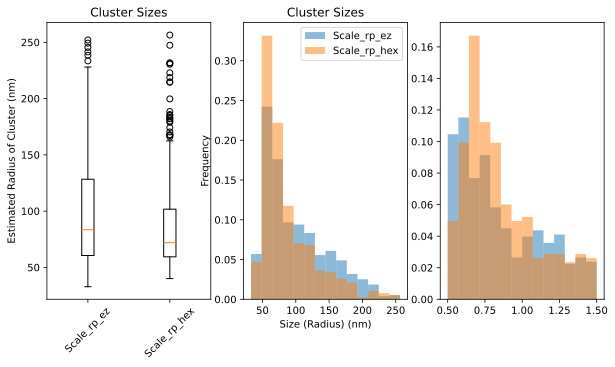

[-84.71070656  84.79255339   1.00013504]


/var/folders/_t/qlzp5l894v16vmr8m_81x5x80000gn/T/ipykernel_13683/1852912368.py:75: RuntimeWarning: divide by zero encountered in log
  ax2.plot(bins_rp_hex, -np.log(values_rp_hex), label='Scale_rp_hex',linestyle='None', marker='o')


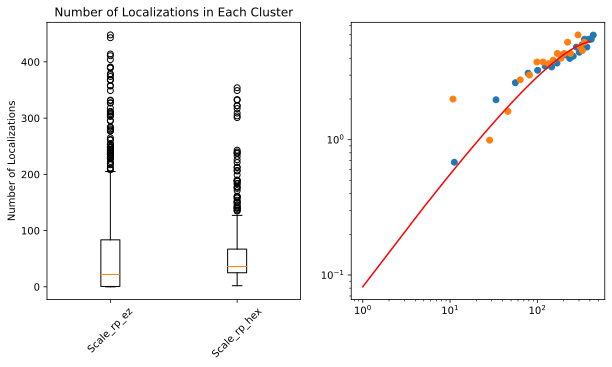

In [43]:
path_rp_ez_2 = "/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/Fixed_100ms/20231017/rp_ez_fixed_2"
path_rp_hex = "/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/Fixed_100ms/20231017/rp_hex5_fixed_2"

files_loc_rp_ez_2 = glob.glob(path_rp_ez_2 + '/**/localizations.csv', recursive=True)
files_dbscan_rp_ez_2 = glob.glob(path_rp_ez_2 + '/**/DBSCAN_clusters.csv', recursive=True)
files_mol_rp_ez_2 = glob.glob(path_rp_ez_2 + '/**/molecule_loc.csv', recursive=True)
files_scale_rp_ez_2 = glob.glob(path_rp_ez_2 + '/**/scale_space_plus_blob_fitted.csv', recursive=True)

files_loc_rp_hex = glob.glob(path_rp_hex + '/**/localizations.csv', recursive=True)
files_dbscan_rp_hex = glob.glob(path_rp_hex + '/**/DBSCAN_clusters.csv', recursive=True)
files_mol_rp_hex = glob.glob(path_rp_hex + '/**/molecule_loc.csv', recursive=True)
files_scale_rp_hex = glob.glob(path_rp_hex + '/**/scale_space_plus_blob_fitted.csv', recursive=True)

#plot the cluster sizes for both as a boxplot for the DBSCAN and the scale space
df_d_rp_ez_2 = pd.concat([pd.read_csv(f, names=['x_pos', 'y_pos', 'radius_x','localizations']) for f in files_dbscan_rp_ez_2], ignore_index=True)
df_d_rp_hex = pd.concat([pd.read_csv(f, names=['x_pos', 'y_pos', 'radius_x','localizations']) for f in files_dbscan_rp_hex], ignore_index=True)
df_rp_ez_2 = pd.concat([pd.read_csv(f, names=['x_pos', 'y_pos', 'radius_x','localizations']) for f in files_scale_rp_ez_2], ignore_index=True)
df_rp_hex = pd.concat([pd.read_csv(f, names=['x_pos', 'y_pos', 'radius_x','localizations']) for f in files_scale_rp_hex], ignore_index=True)

#concat the two rp_ez dataframes
df_rp_ez = pd.concat([df_rp_ez_2], ignore_index=True)

fig = plt.figure(figsize=(10, 5))
gs = fig.add_gridspec(1, 3)
ax1 = fig.add_subplot(gs[0, 0])
#plot all them in one boxplot
ax1.boxplot([ df_rp_ez['radius_x']*130, df_rp_hex['radius_x']*130])
ax1.set_xticklabels([ 'Scale_rp_ez', 'Scale_rp_hex'], rotation=45)
ax1.set_ylabel('Estimated Radius of Cluster (nm)')
ax1.set_title('Cluster Sizes')
ax2 = fig.add_subplot(gs[0, 1])
#plot all them in one histogram
bin_number = 15#np.max([int(np.sqrt(len(df_rp_ez['radius_x']))), int(np.sqrt(len(df_rp_hex['radius_x'])))])
bin_min = np.min([np.min(df_rp_ez['radius_x']*130), np.min(df_rp_hex['radius_x']*130)])
bin_max = np.max([np.max(df_rp_ez['radius_x']*130), np.max(df_rp_hex['radius_x']*130)])
common_bins = np.linspace(bin_min, bin_max, bin_number)
ax2.hist(df_rp_ez['radius_x']*130, bins=common_bins, alpha=0.5, label='Scale_rp_ez',weights=np.ones(len(df_rp_ez['radius_x'])) / len(df_rp_ez['radius_x']))
ax2.hist(df_rp_hex['radius_x']*130, bins=common_bins, alpha=0.5, label='Scale_rp_hex',weights=np.ones(len(df_rp_hex['radius_x'])) / len(df_rp_hex['radius_x']))

ax2.legend(loc='upper right')
ax2.set_xlabel('Size (Radius) (nm)')
ax2.set_ylabel('Frequency')
ax2.set_title('Cluster Sizes')

ax3 = fig.add_subplot(gs[0, 2])
#plot the cluster size divided by the mean cluster size
common_bins = np.linspace(0.5, 1.5, bin_number)
ax3.hist(df_rp_ez['radius_x']*130/np.mean(df_rp_ez['radius_x']*130), bins=common_bins, alpha=0.5, label='Scale_rp_ez',weights=np.ones(len(df_rp_ez['radius_x'])) / len(df_rp_ez['radius_x']))
ax3.hist(df_rp_hex['radius_x']*130/np.mean(df_rp_hex['radius_x']*130), bins=common_bins, alpha=0.5, label='Scale_rp_hex',weights=np.ones(len(df_rp_hex['radius_x'])) / len(df_rp_hex['radius_x']))




plt.show()

#plot the distribution of the number of localizations in each cluster
fig = plt.figure(figsize=(10, 5))
gs = fig.add_gridspec(1, 2)
ax1 = fig.add_subplot(gs[0, 0])
#plot all them in one boxplot
ax1.boxplot([ df_rp_ez['localizations'], df_rp_hex['localizations']])
ax1.set_xticklabels([ 'Scale_rp_ez', 'Scale_rp_hex'], rotation=45)
ax1.set_ylabel('Number of Localizations')
ax1.set_title('Number of Localizations in Each Cluster')
ax2 = fig.add_subplot(gs[0, 1])

values_rp_ez, bins_rp_ez = np.histogram(df_rp_ez['localizations'], bins=20, weights=np.ones(len(df_rp_ez['localizations'])) / len(df_rp_ez['localizations']))
values_rp_hex, bins_rp_hex = np.histogram(df_rp_hex['localizations'], bins=20, weights=np.ones(len(df_rp_hex['localizations'])) / len(df_rp_hex['localizations']))

#set the center of the bins
bins_rp_ez = (bins_rp_ez[:-1] + bins_rp_ez[1:])/2
bins_rp_hex = (bins_rp_hex[:-1] + bins_rp_hex[1:])/2

ax2.plot(bins_rp_ez, -np.log(values_rp_ez), label='Scale_rp_ez',linestyle='None', marker='o')
ax2.plot(bins_rp_hex, -np.log(values_rp_hex), label='Scale_rp_hex',linestyle='None', marker='o')
ax2.set_yscale('log')
ax2.set_xscale('log')
#fit the distribution to the form (a*x^(2/3) + b*x))
from scipy.optimize import curve_fit
def func(x, a, b,c):
    return a*x**(c) + b*x
x = bins_rp_ez
y = -np.log(values_rp_ez)
popt, pcov = curve_fit(func, x, y)
print(popt)

#plot the fit
x_fit = np.linspace(1, 400, 100)
ax2.plot(x_fit, func(x_fit, *popt), 'r-', label='fit')





39022.24074074074
22740.72


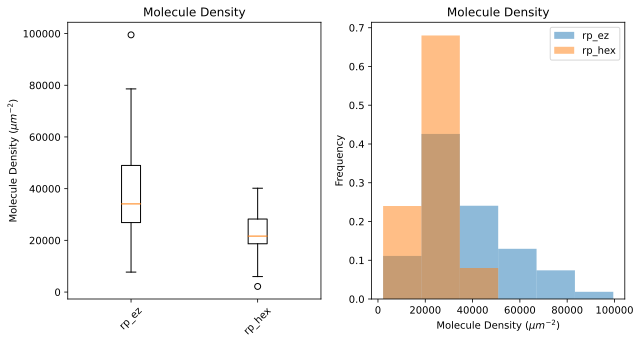

Mean localizations for each cell
rp_ez:  39022.24074074074
rp_hex:  22740.72
Mean area for each cell
rp_ez:  8.224979629629631
rp_hex:  4.541368


In [16]:
#calculate the mol density for each cell

cell_loc_rp_ez_2 = []
cell_area_rp_ez_2 = []
for i in range(len(files_loc_rp_ez_2)):
    cell_loc_rp_ez_2.append(len(pd.read_csv(files_loc_rp_ez_2[i], header=0)))
    cell_area_rp_ez_2.append(pd.read_csv(files_mol_rp_ez_2[i], header=0)['area'].unique()[0])
print(np.mean(cell_loc_rp_ez_2))
for i in range(len(cell_area_rp_ez_2)):
    cell_loc_rp_ez_2[i] = cell_loc_rp_ez_2[i]#/cell_area_rp_ez_2[i]

cell_loc_rp_hex = []
cell_area_rp_hex = []
for i in range(len(files_loc_rp_hex)):
    cell_loc_rp_hex.append(len(pd.read_csv(files_loc_rp_hex[i], header=0)))
    cell_area_rp_hex.append(pd.read_csv(files_mol_rp_hex[i], header=0)['area'].unique()[0])
print(np.mean(cell_loc_rp_hex))
for i in range(len(cell_area_rp_hex)):
    cell_loc_rp_hex[i] = cell_loc_rp_hex[i]#/cell_area_rp_hex[i]

#plot the mol density for each cell
fig = plt.figure(figsize=(10, 5))
gs = fig.add_gridspec(1, 2)
ax1 = fig.add_subplot(gs[0, 0])
#plot all them in one boxplot
ax1.boxplot([cell_loc_rp_ez_2, cell_loc_rp_hex])
ax1.set_xticklabels(['rp_ez', 'rp_hex'], rotation=45)
ax1.set_ylabel('Molecule Density $(\mu m^{-2})$')
ax1.set_title('Molecule Density')
ax2 = fig.add_subplot(gs[0, 1])
#plot all them in one histogram
bin_number = np.max([int(np.sqrt(len(cell_loc_rp_ez_2))), int(np.sqrt(len(cell_loc_rp_hex)))])
bin_min = np.min([np.min(cell_loc_rp_ez_2), np.min(cell_loc_rp_hex)])
bin_max = np.max([np.max(cell_loc_rp_ez_2), np.max(cell_loc_rp_hex)])
common_bins = np.linspace(bin_min, bin_max, bin_number)
ax2.hist(cell_loc_rp_ez_2, bins=common_bins, alpha=0.5, label='rp_ez',weights=np.ones(len(cell_loc_rp_ez_2)) / len(cell_loc_rp_ez_2))
ax2.hist(cell_loc_rp_hex, bins=common_bins, alpha=0.5, label='rp_hex',weights=np.ones(len(cell_loc_rp_hex)) / len(cell_loc_rp_hex))

ax2.legend(loc='upper right')
ax2.set_xlabel('Molecule Density $(\mu m^{-2})$')
ax2.set_ylabel('Frequency')
ax2.set_title('Molecule Density')
plt.show()

#print the mean localizations for each cell
print('Mean localizations for each cell')
print('rp_ez: ', np.mean(cell_loc_rp_ez_2))
print('rp_hex: ', np.mean(cell_loc_rp_hex))

#print the mean area for each cell
print('Mean area for each cell')
print('rp_ez: ', np.mean(cell_area_rp_ez_2))
print('rp_hex: ', np.mean(cell_area_rp_hex))





(array([0.54, 0.38, 0.08, 0.  , 0.  , 0.  ]),
 array([ 2.6195    ,  4.43343333,  6.24736667,  8.0613    ,  9.87523333,
        11.68916667, 13.5031    ]),
 <BarContainer object of 6 artists>)

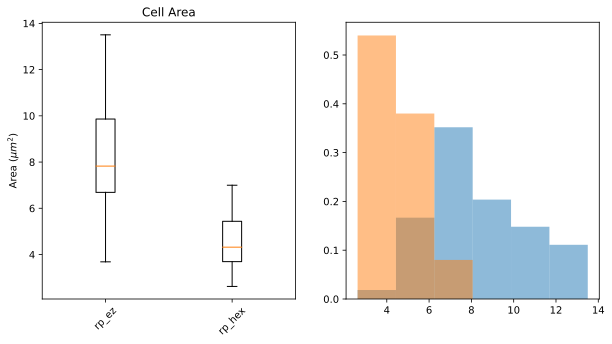

In [13]:
#plot the cell area for each cell
fig = plt.figure(figsize=(10, 5))
gs = fig.add_gridspec(1, 2)
ax1 = fig.add_subplot(gs[0, 0])
#plot all them in one boxplot
ax1.boxplot([cell_area_rp_ez_2, cell_area_rp_hex])
ax1.set_xticklabels(['rp_ez', 'rp_hex'], rotation=45)
ax1.set_ylabel('Area $(\mu m^{2})$')
ax1.set_title('Cell Area')
ax2 = fig.add_subplot(gs[0, 1])
#plot all them in one histogram
bin_number = np.max([int(np.sqrt(len(cell_area_rp_ez_2))), int(np.sqrt(len(cell_area_rp_hex)))])
bin_min = np.min([np.min(cell_area_rp_ez_2), np.min(cell_area_rp_hex)])
bin_max = np.max([np.max(cell_area_rp_ez_2), np.max(cell_area_rp_hex)])
common_bins = np.linspace(bin_min, bin_max, bin_number)
ax2.hist(cell_area_rp_ez_2, bins=common_bins, alpha=0.5, label='rp_ez',weights=np.ones(len(cell_area_rp_ez_2)) / len(cell_area_rp_ez_2))
ax2.hist(cell_area_rp_hex, bins=common_bins, alpha=0.5, label='rp_hex',weights=np.ones(len(cell_area_rp_hex)) / len(cell_area_rp_hex))


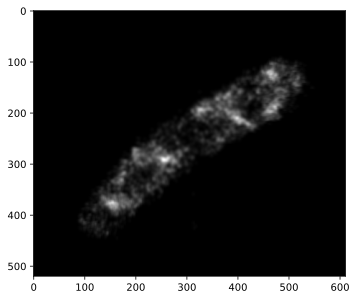

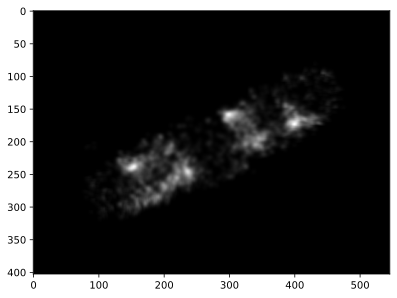

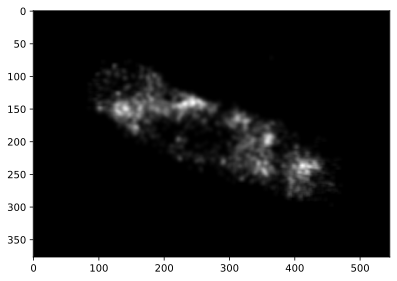

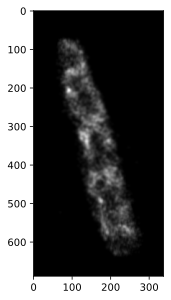

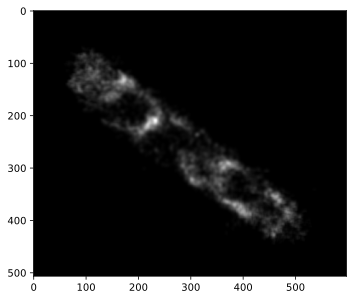

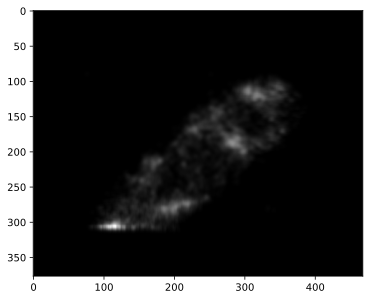

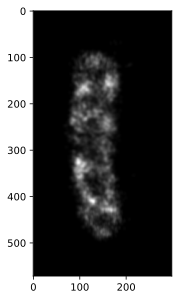

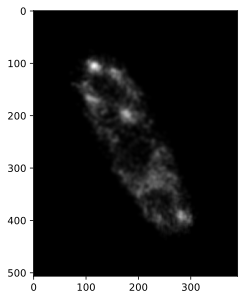

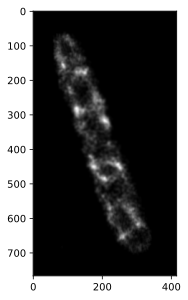

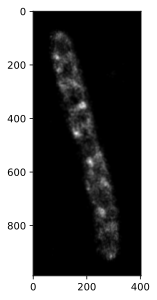

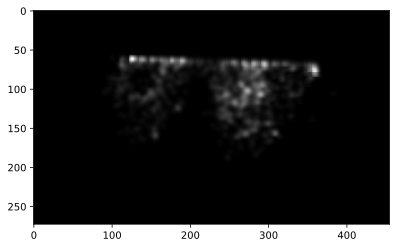

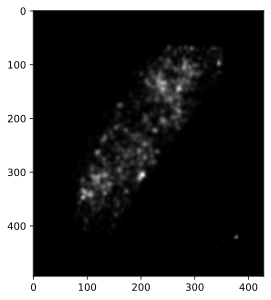

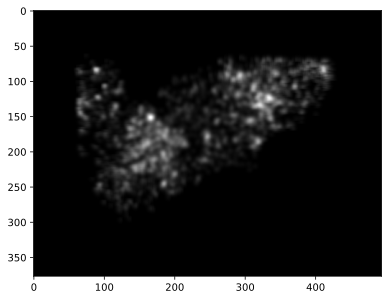

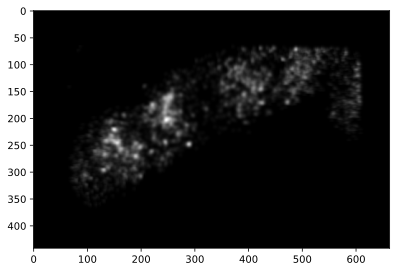

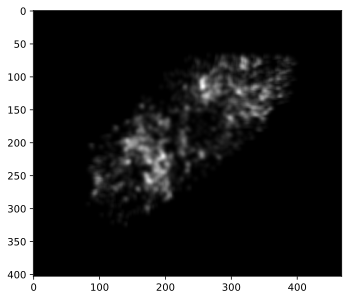

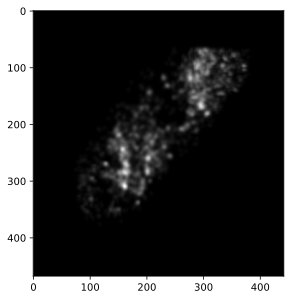

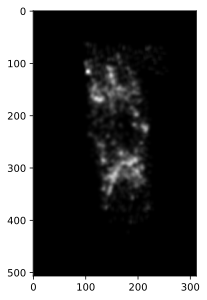

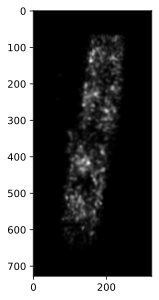

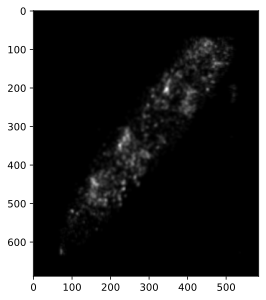

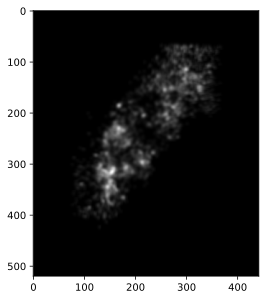

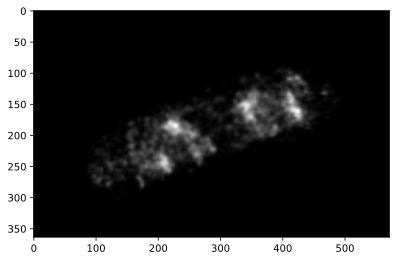

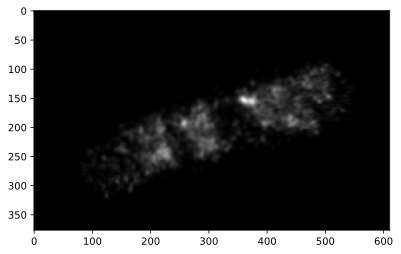

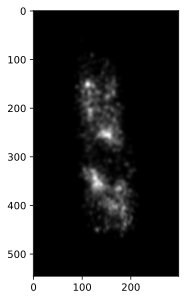

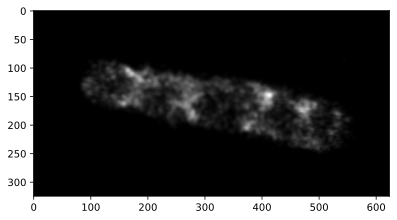

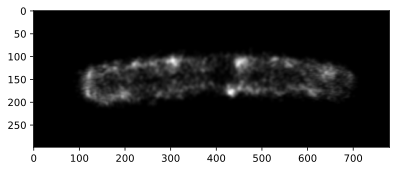

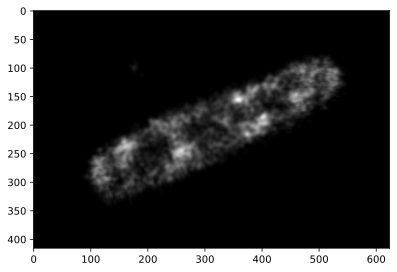

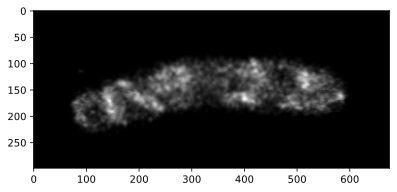

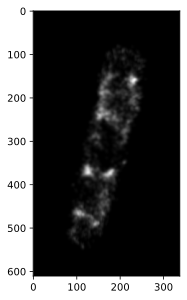

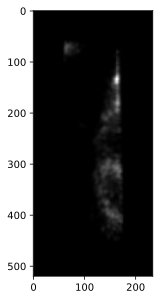

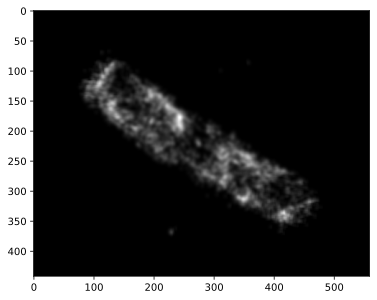

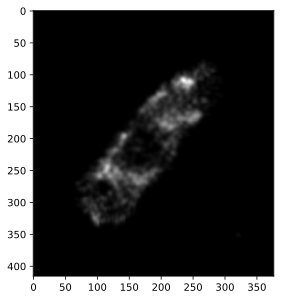

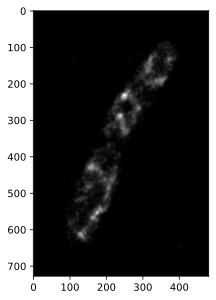

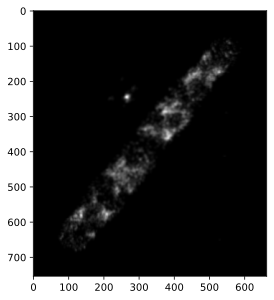

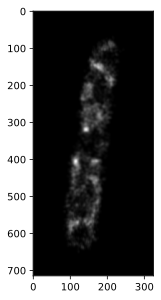

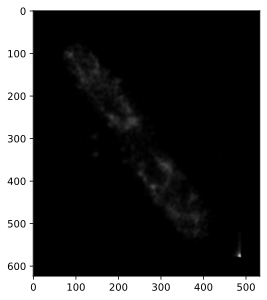

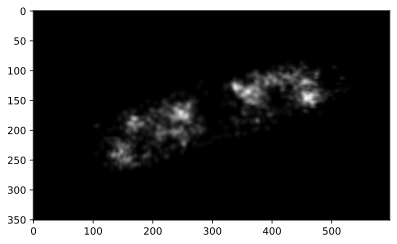

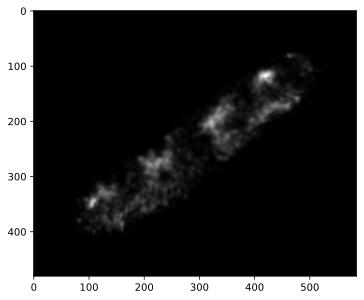

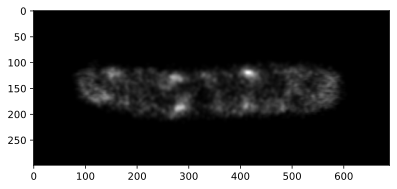

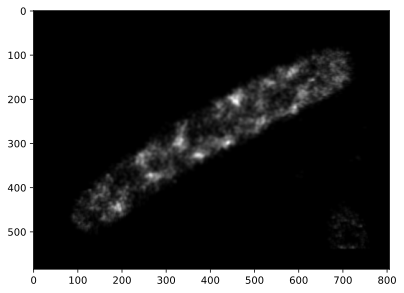

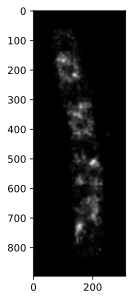

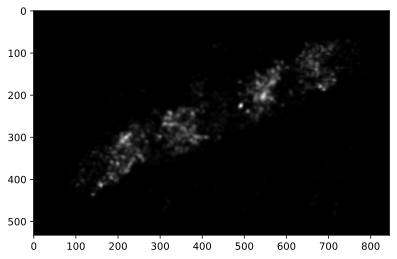

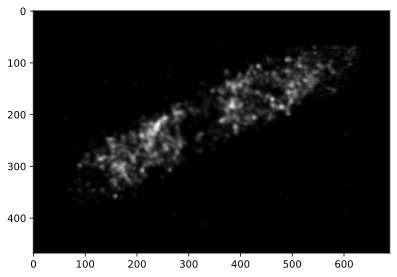

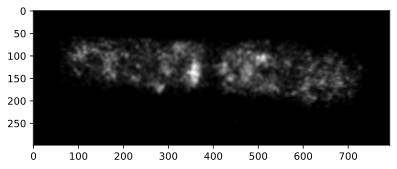

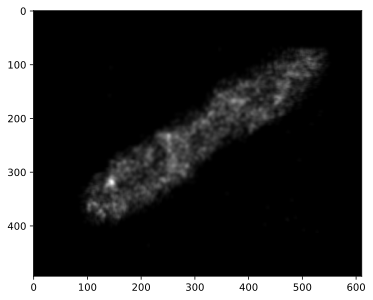

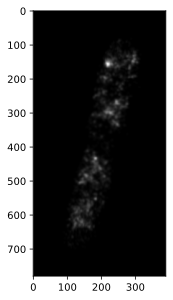

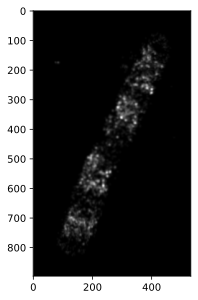

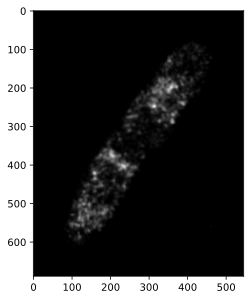

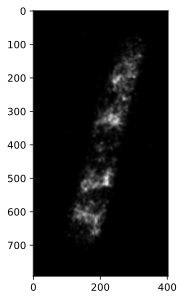

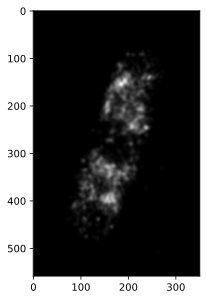

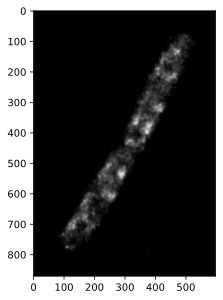

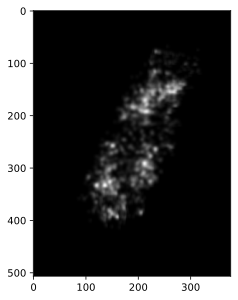

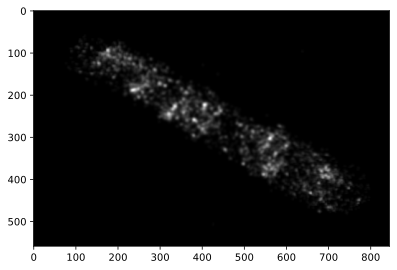

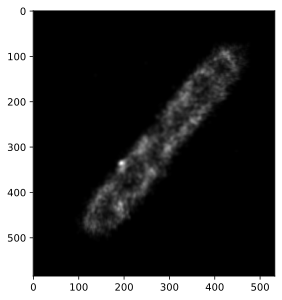

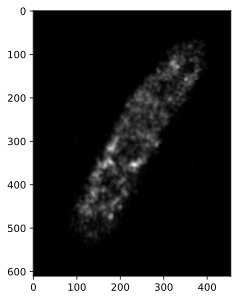

In [15]:
#find all files called reconstruction.tif 
path_img = "/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/Fixed_100ms/20231017/rp_ez_fixed_2/Movies"
files_img = glob.glob(path_img + '/**/reconstruction.tif', recursive=True)
#plot each image
from skimage import io
for i in range(len(files_img)):
    img = io.imread(files_img[i])
    plt.imshow(img, cmap='gray')
    plt.show()
